# Analysis of Results

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
multinomialnb_results = pd.read_csv("output/multinomialnb.csv")
logisticregression_results = pd.read_csv("output/logisticregression.csv")
all_results = pd.concat([multinomialnb_results, logisticregression_results], axis=0)

In [7]:
print(multinomialnb_results.head())
print(logisticregression_results.head())

                   name   learning_model features  clip_counts  negation  \
0  baseline-NB-BoW-clip  MultinomialNB()      bow         True     False   
1        param-exp-NB-1  MultinomialNB()      bow         True      True   
2        param-exp-NB-2  MultinomialNB()      bow         True      True   
3        param-exp-NB-3  MultinomialNB()      bow         True      True   
4        param-exp-NB-4  MultinomialNB()      bow         True      True   

   remove_stopwords  lemmatise  avg_cv_acc      rmse  min_acc  max_acc  
0             False      False      0.8290  0.021071    0.785    0.855  
1              True       True      0.8245  0.020427    0.775    0.850  
2              True      False      0.8245  0.020427    0.775    0.850  
3             False       True      0.8245  0.020427    0.775    0.850  
4             False      False      0.8245  0.020427    0.775    0.850  
                   name        learning_model features  clip_counts  negation  \
0  baseline-LR-BoW-clip 

## Which baseline model had the highest accuracy?

<AxesSubplot:title={'center':"Comparison of different learning model's accuracy using baseline settings (RMSE)"}>

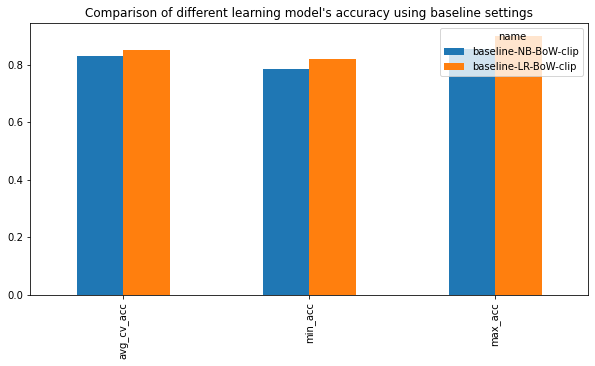

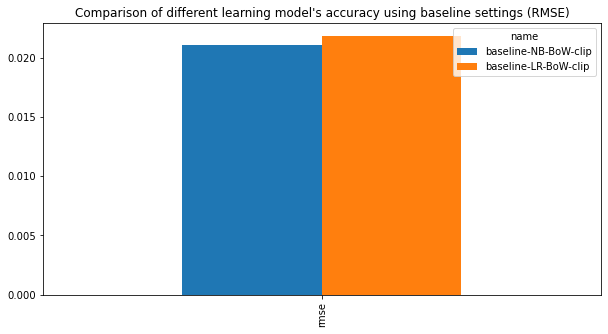

In [28]:
baseline_results = all_results[all_results['name'].str.match('baseline')]
rmse_baseline_results = baseline_results[["name", "rmse"]]
baseline_results = baseline_results[["name", "avg_cv_acc", "min_acc", "max_acc"]]
baseline_results = baseline_results.T
rmse_baseline_results = rmse_baseline_results.T
new_header = baseline_results.iloc[0]
rmse_new_header = rmse_baseline_results.iloc[0]
baseline_results = baseline_results[1:]
rmse_baseline_results = rmse_baseline_results[1:]
baseline_results.columns = new_header
rmse_baseline_results.columns = rmse_new_header
baseline_results.plot(kind='bar', figsize=(10,5), title="Comparison of different learning model's accuracy using baseline settings")
rmse_baseline_results.plot(kind='bar', figsize=(10,5), title="Comparison of different learning model's accuracy using baseline settings (RMSE)")

We can see above......

# How did the baseline models compare to their max and min?

In [36]:
maxnb = multinomialnb_results.iloc[multinomialnb_results['avg_cv_acc'].argmax()]
minnb = multinomialnb_results.iloc[multinomialnb_results['avg_cv_acc'].argmin()]
baselinenb = multinomialnb_results[multinomialnb_results['name'].str.match('baseline')]
naivebayes = baselinenb.append(maxnb, ignore_index=True)
naivebayes = naivebayes.append(minnb, ignore_index=True)

In [37]:
print(naivebayes)

                   name   learning_model features  clip_counts  negation  \
0  baseline-NB-BoW-clip  MultinomialNB()      bow         True     False   
1  baseline-NB-BoW-clip  MultinomialNB()      bow         True     False   
2       param-exp-NB-41  MultinomialNB()      bot        False      True   

   remove_stopwords  lemmatise  avg_cv_acc      rmse  min_acc  max_acc  
0             False      False       0.829  0.021071    0.785    0.855  
1             False      False       0.829  0.021071    0.785    0.855  
2              True       True       0.667  0.035014    0.590    0.710  
